### New York City Taxi Trip Duration

프로젝트 목표 : 뉴욕시에서 택시를 탔을때 총 주행시간를 예측하는 모형 만들기

In [1]:
import pandas as pd

In [2]:
taxi = pd.read_csv("train.csv")

In [5]:
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [15]:
# 총 변수는 11개, 데이터는 1,458,644개
taxi.shape

(1458644, 11)

In [123]:
max(taxi["trip_duration"])
min(taxi["trip_duration"])

1

#### 변수 (Kaggle)

- id - a unique identifier for each trip 
- vendor_id - a code indicating the provider associated with the trip record 
- pickup_datetime - date and time when the meter was engaged 
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- trip_duration - duration of the trip in seconds

#### 변수분석 (11개)

- id : 고유번호
- vendor_id : 주행기록과 관련된 업체를 나타냄 (1,2로만 구성)
- pickup_datetime : 탑승시간 (년, 월, 일, 시간, 분, 초로 구성)
- dropoff_datetime : 하차시간 (년, 월, 일, 시간, 분, 초로 구성)
- passenger_count : 한 택시안의 승객수(명)
- pickup_longitude : 탑승 경도 (좌표)
- pickup_latitude : 탑승 위도 (좌표)
- dropoff_longitude : 하차 경도 (좌표)
- dropoff_latitude : 하차 위도 (좌표)
- store_and_fwd_flag : 주행기록이 차량 메모리에 보관되어 있는지 여부 (yes, no)
- trip_duration : 주행시간 (초)

datetime에 대한 데이터를 좀 더 세분화할 필요성을 보임

- 날짜 같은 경우엔 주말/평일, 혹은 월별, 계절별에 대한 분포를 파악할 수 있을것
- 시간대는 크게 아침/점심/저녁이나 출근시간/퇴근시간 등으로 나눠서 파악해 보는것도 좋을것

#### 탑승 위치 대략적으로 파악해보기

In [87]:
from ipyleaflet import *
import time

In [88]:
center = [40.7830603, -73.9712488] # [위도, 경도]
zoom = 15
m = Map(center = center, zoom = zoom)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[40.7830603, -73.9712488], default_tiles=TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']), layers=(TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='400px'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=15)

In [79]:
marker = Marker(location=center)
m += marker

In [89]:
taxi['pickup'] = list(zip(taxi['pickup_latitude'], taxi['pickup_longitude']))
pickup_sample = list(taxi['pickup'][0:100]) # sample data 생성

In [90]:
locs = pickup_sample
for loc in locs:
    marker = Marker(location=loc)
    m += marker
    time.sleep(0.5)
    


In [212]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

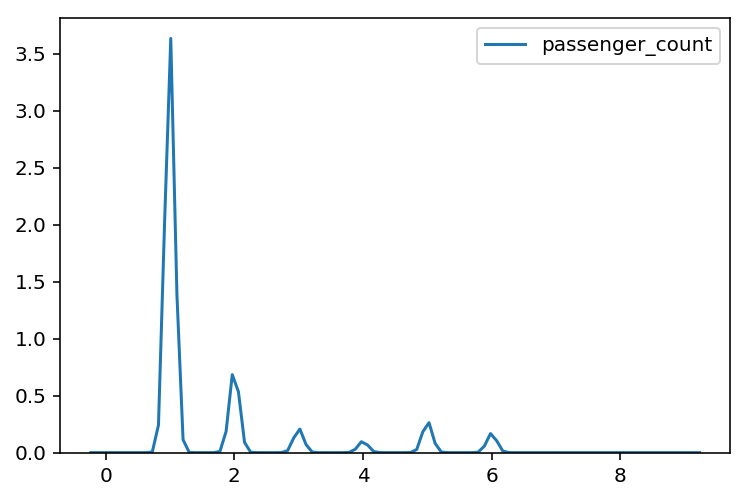

In [128]:
sns.kdeplot(taxi["passenger_count"]) # 승객 탑승인원 분포도, 대부분 혼자 이용하는것을 파악할 수 있음

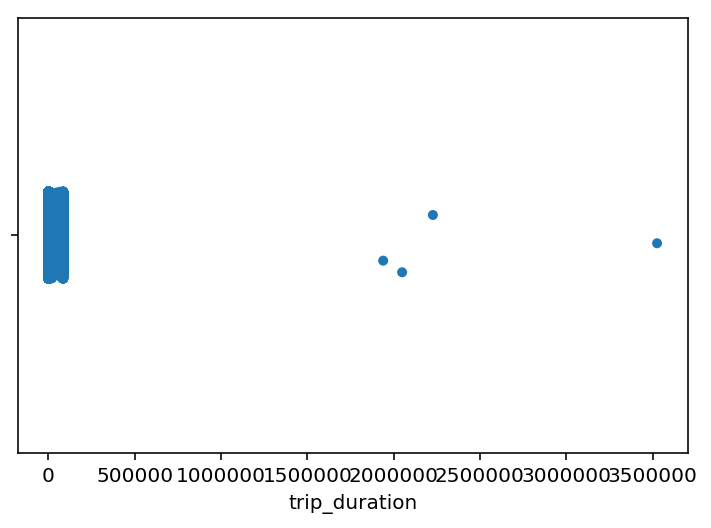

In [126]:
np.random.seed(0)
sns.stripplot(x="trip_duration", data=taxi, jitter=True)
plt.show() # 이상치 4개 발견, 제거하는게 좋을 것으로 판단

In [148]:
outlier = list(taxi["trip_duration"])
outlier.sort()
outlier.reverse()
outlier[0:4] # 이상치 값 발견

[3526282, 2227612, 2049578, 1939736]

In [155]:
len(taxi['trip_duration'][taxi['trip_duration'] < 10]) 
# 이런 데이터들은 미터기를 모르고 켰다가 끈 경우들을 포함하고 있다고 판단됨

1984

#### 그냥 이것저것 일단 만져보자

#### 1. vendor 유형에 따른 데이터 갯수

In [182]:
taxi_vendor = pd.DataFrame(taxi, columns=["vendor_id"])
taxi_vendor = taxi.groupby(["vendor_id"]).size().reset_index(name='Counts')
taxi_vendor

,vendor_id,Counts
0,1,678342
1,2,780302


#### 2. store_and_fwd_flag 유형에 따른 데이터 갯수

In [185]:
taxi_store = pd.DataFrame(taxi, columns=["store_and_fwd_flag"])
taxi_store = taxi.groupby(["store_and_fwd_flag"]).size().reset_index(name='Counts')
taxi_store

,store_and_fwd_flag,Counts
0,N,1450599
1,Y,8045


- store_and_fwd_flag를 안한 횟수가 훨씬 많은데 이건 상관 없는 변수인가?

#### 3. passenger_count 유형에 따른 데이터 갯수

In [184]:
taxi_passenger = pd.DataFrame(taxi, columns=["passenger_count"])
taxi_passenger = taxi.groupby(["passenger_count"]).size().reset_index(name='Counts')
taxi_passenger 

,passenger_count,Counts
0,0,60
1,1,1033540
2,2,210318
3,3,59896
4,4,28404
5,5,78088
6,6,48333
7,7,3
8,8,1
9,9,1


- 승객이 0명인것은 무엇을 의미하는지 파악해야 (오작동으로 봐야할지 다른 의미가 있는건지)
- 택시가 몇인용까지 있는지를 확인해야 (7~9명은 이상치로 판단)